In [ ]:
f# colab 사용자만 실행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 런타임 -> 런타임 다시 시작하고 아래 한글폰트 설정 시작
# 위에서 csv 파일은 다시 불러와야함.

In [ ]:
# matplotlib.pyplot 을 통해 한글폰트를 설정합니다.
# plt.style.use 로 "fivethirtyeight" 스타일을 사용해 봅니다.

import matplotlib.pyplot as plt
import pandas as pd

plt.rc('font', family='NanumBarunGothic') 
plt.style.use('fivethirtyeight')
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

pd.Series([1,3,-5,2,8]).plot.bar(title='한글제목')

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
price = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/2nd project/1401-2110_가격.xlsx')
weather = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2nd project/1401-2109_기온강수일조.csv', encoding = 'cp949')
amount = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2nd project/13-21_통계청_채소생산량(재배면적).csv', encoding = 'cp949')

# 1. 전처리

## price

In [ ]:
price['년월'] = '20' + price['년월']
price['년월'] = price['년월'].str.replace('. ','-')
price['년월'] = pd.to_datetime(price['년월'], format="%Y-%m")
price.head()

,년월,품목,품종,시장,법인,광역산지,시군산지,도매가격(원/kg),거래량(톤),거래금액(백만원)
0,2021-10-01,양파,양파(일반),대구북부도매,대양청과,경북,영천,793.000000,40.00,31.72
1,2021-10-01,양파,양파(일반),대구북부도매,효성청과,경북,의성,803.030303,31.68,25.44
2,2021-10-01,양파,양파(일반),대구북부도매,대양청과,경남,합천,769.686727,24.26,18.67
3,2021-10-01,양파,양파(일반),대구북부도매,대양청과,대구,대구중구,735.000000,15.20,11.17
4,2021-10-01,양파,양파(일반),대구북부도매,효성청과,경북,영천,843.434343,7.92,6.68


In [ ]:
pyplot.scatter(price['년월'], price['도매가격(원/kg)'])

In [ ]:
#이상치 처리
quartile_1 = price['도매가격(원/kg)'].quantile(0.25)
quartile_3 = price['도매가격(원/kg)'].quantile(0.75)
IQR = quartile_3 - quartile_1 # 약 400원
search_df = price[(price['도매가격(원/kg)'] < (quartile_1 - 5 * IQR)) | (price['도매가격(원/kg)'] > (quartile_3 + 5 * IQR))]
print(search_df) # 99

In [ ]:
price = price.drop(search_df.index, axis = 0)
print(price)

              년월  품목      품종      시장  ...  시군산지   도매가격(원/kg) 거래량(톤)  거래금액(백만원)
0     2021-10-01  양파  양파(일반)  대구북부도매  ...    영천   793.000000  40.00      31.72
1     2021-10-01  양파  양파(일반)  대구북부도매  ...    의성   803.030303  31.68      25.44
2     2021-10-01  양파  양파(일반)  대구북부도매  ...    합천   769.686727  24.26      18.67
3     2021-10-01  양파  양파(일반)  대구북부도매  ...  대구중구   735.000000  15.20      11.17
4     2021-10-01  양파  양파(일반)  대구북부도매  ...    영천   843.434343   7.92       6.68
...          ...  ..     ...     ...  ...   ...          ...    ...        ...
45617 2014-01-01  양파    자주양파  서울가락도매  ...    문경  1474.674221   7.06      10.41
45618 2014-01-01  양파    자주양파  서울가락도매  ...    무안  1250.809637   5.06       6.33
45619 2014-01-01  양파    자주양파  서울가락도매  ...    함양  1333.045977   0.70       0.93
45620 2014-01-01  양파     깐양파  서울가락도매  ...    신안   778.142415   6.46       5.03
45621 2014-01-01  양파     깐양파  서울가락도매  ...    무안   687.457627   0.59       0.41

[45523 rows x 10 columns]


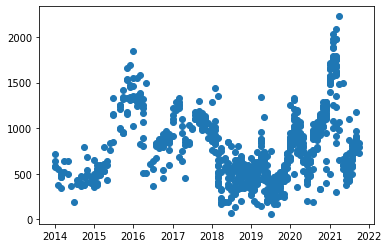

In [ ]:
from matplotlib import pyplot
pyplot.scatter(price[price['시군산지'] == '영천']['년월'], price[price['시군산지'] == '영천']['도매가격(원/kg)'])

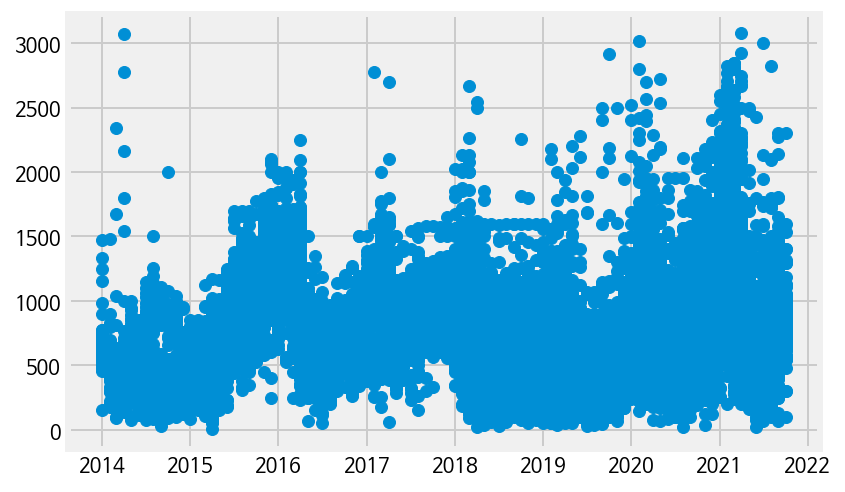

In [ ]:
pyplot.scatter(price['년월'], price['도매가격(원/kg)'])

In [ ]:
price['연'] = price['년월'].astype(str).map(lambda x: x[2:4])
price['월'] = price['년월'].astype(str).map(lambda x: x[5:7])
price.drop(['년월', '품목', '거래량(톤)', '거래금액(백만원)'], axis=1, inplace=True)
price['도매가격(원/kg)'] = price['도매가격(원/kg)'].apply(lambda x: f"{x:.2f}")

price.head()

,품종,시장,법인,광역산지,시군산지,도매가격(원/kg),연,월
0,양파(일반),대구북부도매,대양청과,경북,영천,793.00,21,10
1,양파(일반),대구북부도매,효성청과,경북,의성,803.03,21,10
2,양파(일반),대구북부도매,대양청과,경남,합천,769.69,21,10
3,양파(일반),대구북부도매,대양청과,대구,대구중구,735.00,21,10
4,양파(일반),대구북부도매,효성청과,경북,영천,843.43,21,10


In [ ]:
price.to_csv('/content/drive/MyDrive/Colab Notebooks/2nd project/price.csv', index = False)

## amount

In [ ]:
amount.head()

,시점,시도별,양파:면적 (ha),10a당 생산량 (kg),생산량 (톤)
0,2013,서울특별시,0,0,0
1,2013,부산광역시,23,8265,1901
2,2013,대구광역시,81,6909,5596
3,2013,인천광역시,25,2294,573
4,2013,광주광역시,58,7443,4317


In [ ]:
amount['연'] = amount['시점'].astype(str).map(lambda x: x[2:])
amount.drop(['시점'], axis=1, inplace=True)
amount.columns = ['시도별', '재배면적', '재배비율', '생산량', '연']

amount.head()

,시도별,재배면적,재배비율,생산량,연
0,서울특별시,0,0,0,13
1,부산광역시,23,8265,1901,13
2,대구광역시,81,6909,5596,13
3,인천광역시,25,2294,573,13
4,광주광역시,58,7443,4317,13


In [ ]:
amount = amount.astype({'연':'int'})
amount.dtypes

시도별     object
재배면적     int64
재배비율     int64
생산량      int64
연        int64
dtype: object

In [ ]:
amount['연'] = amount['연'] + 1

In [ ]:
amount.to_csv('/content/drive/MyDrive/Colab Notebooks/2nd project/amount.csv', index = False)

## 지역

###  price['광역산지']의 미분류, -, 수입 제거

In [ ]:
price['광역산지'].unique()

array(['경북', '경남', '대구', '전남', '미분류', '광주', '강원', '전북', '인천', '대전', '경기',
       '부산', '충북', '충남', '서울', '-', '울산', '제주', '수입'], dtype=object)

In [ ]:
price[price['광역산지'] =='미분류'] #358

In [ ]:
price[price['광역산지'] =='-'] #265

In [ ]:
price[price['광역산지'] =='수입'] #1243

In [ ]:
idx_미분류 = price[price['광역산지'] == '미분류'].index
idx_ = price[price['광역산지'] == '-'].index
idx_수입 = price[price['광역산지'] == '수입'].index

price.drop(idx_미분류, inplace=True)
price.drop(idx_, inplace=True)
price.drop(idx_수입, inplace=True)

In [ ]:
price['광역산지'].unique()

array(['경북', '경남', '대구', '전남', '광주', '강원', '전북', '인천', '대전', '경기', '부산',
       '충북', '충남', '서울', '울산', '제주'], dtype=object)

In [ ]:
price.to_csv('/content/drive/MyDrive/Colab Notebooks/2nd project/price2.csv', index = False)

### price['광역산지']와 amount['광역'] 일치시키기

In [ ]:
amount['시도별'] = amount['시도별'].str.replace('충청북도', '충북')
amount['시도별'] = amount['시도별'].str.replace('충청남도', '충남')
amount['시도별'] = amount['시도별'].str.replace('전라북도', '전북')
amount['시도별'] = amount['시도별'].str.replace('전라남도', '전남')
amount['시도별'] = amount['시도별'].str.replace('경상북도', '경북')
amount['시도별'] = amount['시도별'].str.replace('경상남도', '경남')

In [ ]:
amount['시도별'].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '경기도', '강원도', '충북', '충남', '전북', '전남', '경북', '경남', '제주도', '세종특별자치시'],
      dtype=object)

In [ ]:
amount['광역산지'] = amount['시도별'].astype(str).map(lambda x: x[:2])

In [ ]:
amount['광역산지'].unique()

array(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '경기', '강원', '충북', '충남',
       '전북', '전남', '경북', '경남', '제주', '세종'], dtype=object)

In [ ]:
amount.drop(['시도별'], axis=1, inplace=True)

In [ ]:
amount

,재배면적,재배비율,생산량,연,광역산지
0,0,0,0,14,서울
1,23,8265,1901,14,부산
2,81,6909,5596,14,대구
3,25,2294,573,14,인천
4,58,7443,4317,14,광주
...,...,...,...,...,...
145,1687,8314,140261,22,전북
146,6775,8547,579042,22,전남
147,3159,9739,307653,22,경북
148,4023,8423,338877,22,경남


### amount['광역']의 세종 제거

In [ ]:
price['광역산지'].unique()

array(['경북', '경남', '대구', '전남', '광주', '강원', '전북', '인천', '대전', '경기', '부산',
       '충북', '충남', '서울', '울산', '제주'], dtype=object)

In [ ]:
idx_세종 = amount[amount['광역산지'] == '세종'].index
amount.drop(idx_세종, inplace=True)

amount['광역산지'].unique()

array(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '경기', '강원', '충북', '충남',
       '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [ ]:
amount.to_csv('/content/drive/MyDrive/Colab Notebooks/2nd project/amount2.csv', index = False)

## price와 amount 합치기

In [ ]:
price = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2nd project/price2.csv')
price.dtypes

In [ ]:
amount.dtypes

In [ ]:
merge = pd.merge(price, amount, on = ['연', '광역산지'])

In [ ]:
merge

,품종,시장,법인,광역산지,시군산지,도매가격(원/kg),연,월,재배면적,재배비율,생산량
0,양파(일반),대구북부도매,대양청과,경북,영천,793.00,21,10,2365,8098,191509
1,양파(일반),대구북부도매,효성청과,경북,의성,803.03,21,10,2365,8098,191509
2,양파(일반),대구북부도매,효성청과,경북,영천,843.43,21,10,2365,8098,191509
3,양파(일반),대구북부도매,대양청과,경북,성주,781.82,21,10,2365,8098,191509
4,양파(일반),대구북부도매,대양청과,경북,고령,800.00,21,10,2365,8098,191509
...,...,...,...,...,...,...,...,...,...,...,...
43654,기타,안산도매,안산농산물,인천,연수,509.33,14,3,25,2294,573
43655,기타,서울강서도매,서부청과,대전,대전중구,251.76,14,7,3,4191,126
43656,만생양파,수원도매,수원청과물,대전,대덕,375.00,14,7,3,4191,126
43657,기타,서울강서도매,서부청과,대전,대전중구,264.77,14,6,3,4191,126


In [ ]:
merge['광역산지'].unique()

array(['경북', '경남', '대구', '전남', '광주', '강원', '전북', '인천', '대전', '경기', '부산',
       '충북', '충남', '서울', '울산', '제주'], dtype=object)

In [ ]:
merge.to_csv('/content/drive/MyDrive/Colab Notebooks/2nd project/merge.csv', index = False)

## top 39만 추출

In [ ]:
merge = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2nd project/merge.csv')

In [ ]:
top = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2nd project/시군산지_기후관측소기준 TOP39.csv')
top.drop(['광역산지', '합계 : 거래금액(백만원)', '합계 : 거래량(톤)'], axis=1, inplace=True)
top.head()

,시군산지,기후관측소기준
0,무안,목포
1,함평,영광
2,창녕,밀양
3,신안,목포
4,합천,합천


In [ ]:
top['시군산지'].unique()

array(['무안', '함평', '창녕', '신안', '합천', '제주', '구리', '함양', '영천', '고흥', '해남',
       '고령', '의성', '김천', '논산', '부안', '문경', '달성', '군위', '서귀포', '고창', '완주',
       '의령', '서산', '익산', '장흥', '경산', '밀양', '창원의창', '대구중구', '영주', '안동',
       '여수', '나주', '광주서구', '영암', '연제', '구미', '거창'], dtype=object)

In [ ]:
top.to_csv('/content/drive/MyDrive/Colab Notebooks/2nd project/시군산지_기후관측소기준 TOP39.csv', index = False)

In [ ]:
top39 = merge[merge['시군산지'].str.contains('무안|함평|창녕|신안|합천|제주|구리|함양|영천|고흥|해남|\
       |고령|의성|김천|논산|부안|문경|달성|군위|서귀포|고창|완주|\
       |의령|서산|익산|장흥|경산|밀양|창원의창|대구중구|영주|안동|\
       |여수|나주|광주서구|영암|연제|구미|거창')]

In [ ]:
top39['시군산지'].unique()

array(['영천', '의성', '고령', '구미', '군위', '안동', '문경', '영주', '김천', '경산', '합천',
       '밀양', '창녕', '함양', '의령', '창원의창', '거창', '대구중구', '달성', '무안', '해남',
       '함평', '신안', '영암', '나주', '고흥', '여수', '장흥', '광주서구', '고창', '완주', '익산',
       '부안', '구리', '연제', '서산', '논산', '천안동남', '제주', '서귀포'], dtype=object)

In [ ]:
idx_천안동남 = top39[top39['시군산지'] == '천안동남'].index
top39.drop(idx_천안동남, inplace=True)

top39['시군산지'].unique()

array(['영천', '의성', '고령', '구미', '군위', '안동', '문경', '영주', '김천', '경산', '합천',
       '밀양', '창녕', '함양', '의령', '창원의창', '거창', '대구중구', '달성', '무안', '해남',
       '함평', '신안', '영암', '나주', '고흥', '여수', '장흥', '광주서구', '고창', '완주', '익산',
       '부안', '구리', '연제', '서산', '논산', '제주', '서귀포'], dtype=object)

In [ ]:
top_merge = pd.merge(top39, top, on = ['시군산지'])

In [ ]:
top_merge[top_merge['시군산지'] == '무안']

In [ ]:
top_merge.to_csv('/content/drive/MyDrive/Colab Notebooks/2nd project/top_merge.csv', index = False)

# 2. Modeling - sklearn Package

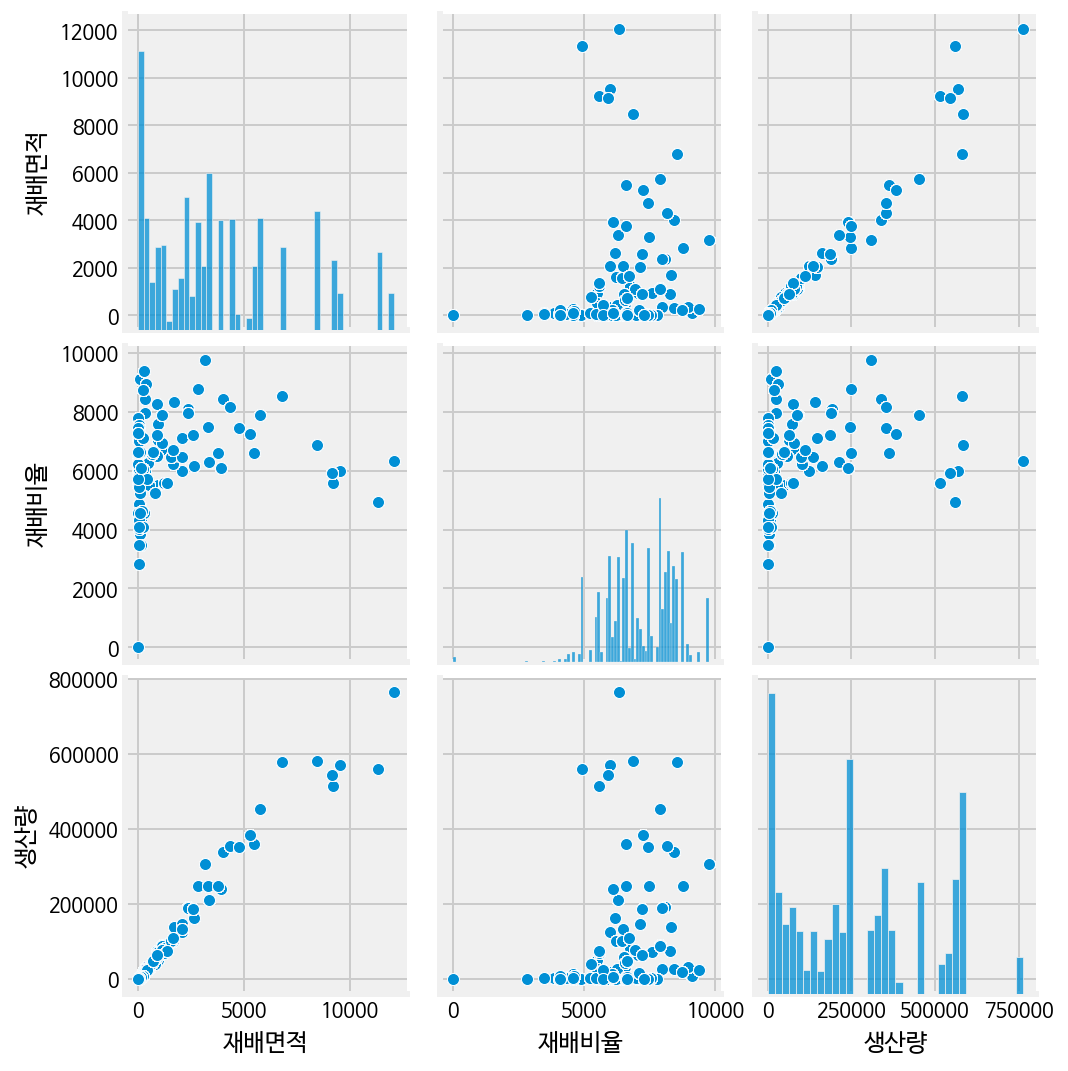

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(merge)
plt.show()

In [ ]:
top_merge.head()

,품종,시장,법인,광역산지,시군산지,도매가격(원/kg),연,월,재배면적,재배비율,생산량,기후관측소기준
0,양파(일반),대구북부도매,대양청과,경북,영천,793.00,21,10,3159,9739,307653,영천
1,양파(일반),대구북부도매,효성청과,경북,영천,843.43,21,10,3159,9739,307653,영천
2,기타,포항도매,대구경북능금원협,경북,영천,725.00,21,10,3159,9739,307653,영천
3,양파(일반),대구북부도매,대양청과,경북,영천,804.59,21,9,3159,9739,307653,영천
4,양파(일반),대구북부도매,효성청과,경북,영천,890.58,21,9,3159,9739,307653,영천


In [ ]:
top_merge = top_merge.astype({'품종':'str'})
top_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 0 to 29978
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   품종          29979 non-null  object 
 1   시장          29979 non-null  object 
 2   법인          29979 non-null  object 
 3   광역산지        29979 non-null  object 
 4   시군산지        29979 non-null  object 
 5   도매가격(원/kg)  29979 non-null  float64
 6   연           29979 non-null  int64  
 7   월           29979 non-null  int64  
 8   재배면적        29979 non-null  int64  
 9   재배비율        29979 non-null  int64  
 10  생산량         29979 non-null  int64  
 11  기후관측소기준     29979 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 3.0+ MB


In [ ]:
top_merge.columns = ['kind', 'market', 'corp', 'wide', 'city', 'price', 'year', 'month', 'area', 'ratio', 'amount', 'weather']
top_merge.head()

,kind,market,corp,wide,city,price,year,month,area,ratio,amount,weather
0,양파(일반),대구북부도매,대양청과,경북,영천,793.00,21,10,2365,8098,191509,영천
1,양파(일반),대구북부도매,효성청과,경북,영천,843.43,21,10,2365,8098,191509,영천
2,기타,포항도매,대구경북능금원협,경북,영천,725.00,21,10,2365,8098,191509,영천
3,양파(일반),대구북부도매,대양청과,경북,영천,804.59,21,9,2365,8098,191509,영천
4,양파(일반),대구북부도매,효성청과,경북,영천,890.58,21,9,2365,8098,191509,영천


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder1 = LabelEncoder()
top_merge['kind'] = encoder1.fit_transform(top_merge.kind)

In [ ]:
encoder2 = LabelEncoder()
top_merge['market'] = encoder2.fit_transform(top_merge.market)

In [ ]:
encoder3 = LabelEncoder()
top_merge['corp'] = encoder3.fit_transform(top_merge.corp)

In [ ]:
encoder4 = LabelEncoder()
top_merge['wide'] = encoder4.fit_transform(top_merge.wide)

In [ ]:
encoder5 = LabelEncoder()
top_merge['city'] = encoder5.fit_transform(top_merge.city)

In [ ]:
top_merge.columns

Index(['kind', 'market', 'corp', 'wide', 'city', 'price', 'year', 'month',
       'area', 'ratio', 'amount', 'weather'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

X = top_merge[['kind', 'market', 'corp', 'wide', 'city', 'year', 'month', 'area', 'ratio', 'amount']]
y = top_merge['price']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (20997, 10) (20997,)
Test Data :  (9000, 10) (9000,)


In [ ]:
from sklearn.linear_model import LinearRegression

RA = LinearRegression()
RA.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_hat = RA.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, y_hat)

np.sqrt(mse)

845.0931083436058

# 3. Modeling - statsmodels package

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(top_merge,
                                       test_size = 0.3,
                                       random_state = 2045)

train_set.shape, test_set.shape

((20997, 12), (9000, 12))

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20997 entries, 18120 to 7031
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   kind     20997 non-null  int64  
 1   market   20997 non-null  int64  
 2   corp     20997 non-null  int64  
 3   wide     20997 non-null  int64  
 4   city     20997 non-null  int64  
 5   price    20997 non-null  float64
 6   year     20997 non-null  int64  
 7   month    20997 non-null  int64  
 8   area     20997 non-null  int64  
 9   ratio    20997 non-null  int64  
 10  amount   20997 non-null  int64  
 11  weather  20997 non-null  object 
dtypes: float64(1), int64(10), object(1)
memory usage: 2.1+ MB


In [ ]:
import statsmodels.formula.api as smf

Model = smf.ols(formula = 'price ~ kind + market + corp + wide + city + year + month + area + ratio + amount',
                data = train_set).fit()

In [ ]:
y_hat_1 = Model.predict(test_set[['kind', 'market', 'corp', 'wide', 'city', 'year', 'month', 'area', 'ratio', 'amount']])

In [ ]:
mse1 = mean_squared_error(test_set.price, y_hat_1)
np.sqrt(mse1)

845.0931083436055

* sklearn과 statsmodel 비교

In [ ]:
print('statsmodels :', np.sqrt(mse1))
print('sklearn     :', np.sqrt(mse))

statsmodels : 845.0931083436055
sklearn     : 845.0931083436058


* 더 큰 범위인 market과 wide 제거

In [ ]:
import statsmodels.formula.api as smf

Model_2 = smf.ols(formula = 'price ~ kind + corp + city + year + month + area + ratio + amount',
                data = train_set).fit()

In [ ]:
y_hat_2 = Model_2.predict(test_set[['kind', 'corp', 'city', 'year', 'month', 'area', 'ratio', 'amount']])

In [ ]:
mse2 = mean_squared_error(test_set.price, y_hat_2)
np.sqrt(mse2)

845.1827778975137

* 생산량이 의미 있는지 확인하기 위해 제거

In [ ]:
import statsmodels.formula.api as smf

Model_3 = smf.ols(formula = 'price ~ kind + corp + city + year + month',
                data = train_set).fit()

In [ ]:
y_hat_3 = Model_3.predict(test_set[['kind', 'corp', 'city', 'year', 'month']])

In [ ]:
mse3 = mean_squared_error(test_set.price, y_hat_3)
np.sqrt(mse3)

846.3149259546749

# 전처리 2

In [ ]:
inn = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/2nd project/1601-2108_수입량.xlsx', thousands=',')
out = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/2nd project/1601-2108_수출량.xlsx', thousands=',')

In [ ]:
inn.drop(['수출입구분', '품목', '품종', '국가', '거래금액(천달러)', '단가(달러/톤)'], axis=1, inplace=True)
inn.head()

In [ ]:
inns = inn.groupby(by=['년월'], as_index=False).sum()
inns

In [ ]:
out.drop(['수출입구분', '품목', '품종', '국가', '거래금액(천달러)', '단가(달러/톤)'], axis=1, inplace=True)
out.head()

In [ ]:
outs = out.groupby(by=['년월'], as_index=False).sum()
outs

In [ ]:
inout = pd.merge(inns, outs, on = ['년월'])
inout.head()

In [ ]:
inout['연'] = inout['년월'].astype(str).map(lambda x: x[:2])
inout['월'] = inout['년월'].astype(str).map(lambda x: x[4:])
inout.head()

In [ ]:
inout.drop(['년월'], axis=1, inplace=True)
inout.columns = ['inn', 'out', 'year', 'month']
inout.head()

,inn,out,year,month
0,24407.001,1.000,16,1
1,1417.701,26.206,16,10
2,2110.050,10.300,16,11
3,2619.802,4.100,16,12
4,6681.080,0.305,16,2


In [ ]:
inout = inout.astype({'year':'int', 'month':'int'})

In [ ]:
inout['year'] = inout['year'] + 1
inout.head()

,inn,out,year,month
0,24407.001,1.000,17,1
1,1417.701,26.206,17,10
2,2110.050,10.300,17,11
3,2619.802,4.100,17,12
4,6681.080,0.305,17,2


In [ ]:
inout.to_csv('/content/drive/MyDrive/Colab Notebooks/2nd project/inout.csv', index = False)

In [ ]:
top_merge.head()

,kind,market,corp,wide,city,price,year,month,area,ratio,amount,weather
0,양파(일반),대구북부도매,대양청과,경북,영천,793.00,21,10,2365,8098,191509,영천
1,양파(일반),대구북부도매,효성청과,경북,영천,843.43,21,10,2365,8098,191509,영천
2,기타,포항도매,대구경북능금원협,경북,영천,725.00,21,10,2365,8098,191509,영천
3,양파(일반),대구북부도매,대양청과,경북,영천,804.59,21,9,2365,8098,191509,영천
4,양파(일반),대구북부도매,효성청과,경북,영천,890.58,21,9,2365,8098,191509,영천


In [ ]:
inout_merge = pd.merge(top_merge, inout, on = ['year', 'month'])
inout_merge

,kind,market,corp,wide,city,price,year,month,area,ratio,amount,weather,inn,out
0,양파(일반),대구북부도매,대양청과,경북,영천,793.00,21,10,2365,8098,191509,영천,5213.902,7.88
1,양파(일반),대구북부도매,효성청과,경북,영천,843.43,21,10,2365,8098,191509,영천,5213.902,7.88
2,기타,포항도매,대구경북능금원협,경북,영천,725.00,21,10,2365,8098,191509,영천,5213.902,7.88
3,양파(일반),대구북부도매,효성청과,경북,의성,803.03,21,10,2365,8098,191509,의성,5213.902,7.88
4,양파(일반),부산엄궁도매,부산청과,경북,의성,785.80,21,10,2365,8098,191509,의성,5213.902,7.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25121,양파(수입),구리도매,구리청과,경기,구리,1066.64,17,1,217,6046,13120,서울,24407.001,1.00
25122,기타,서울가락도매,중앙청과,충남,서산,924.17,17,1,453,6270,28405,서산,24407.001,1.00
25123,자주양파,서울가락도매,중앙청과,충남,서산,775.00,17,1,453,6270,28405,서산,24407.001,1.00
25124,깐양파,안산도매,안산농산물,충남,서산,1066.67,17,1,453,6270,28405,서산,24407.001,1.00


In [ ]:
inout_merge.to_csv('/content/drive/MyDrive/Colab Notebooks/2nd project/inout_merge.csv', index = False)

# 4. Modeling - 수입수출량 포함

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(inout_merge,
                                       test_size = 0.3,
                                       random_state = 2045)

train_set.shape, test_set.shape

((18323, 14), (7853, 14))

In [ ]:
import statsmodels.formula.api as smf

Model_4 = smf.ols(formula = 'price ~ kind + market + corp + wide + city + year + month + area + ratio + amount + inn + out',
                data = train_set).fit()

In [ ]:
y_hat_4 = Model_4.predict(test_set[['kind',	'market',	'corp',	'wide',	'city',	'year',
                                    'month',	'area',	'ratio',	'amount', 'inn',	'out']])

In [ ]:
mse4 = mean_squared_error(test_set.price, y_hat_4)
np.sqrt(mse4)

300.71958637369437

In [ ]:
from sklearn.metrics import mean_absolute_error
import numpy as np
mae = mean_absolute_error(test_set.price, y_hat_4)
norm=(abs(test_set.price).sum())/len(test_set.price)
nmae=mae/norm
print('nmae:', nmae)

nmae: 0.2923236358273176


# 전처리 3

In [ ]:
import pandas as pd

weather3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2nd project/기후관측(21.10~12).csv', encoding = 'cp949')
weather3['year'] = weather3['연'].astype(str).map(lambda x: x[2:])
weather3.rename(columns = {'기상관측소':'weather'}, inplace = True)
weather3.drop(['연'], axis=1, inplace=True)
weather3.head()

,weather,AT_1,AT_2,AT_3,AT_4,AT_5,AT_6,AT_7,AT_8,AT_9,AT_10,AT_11,AT_12,HT_1,HT_2,HT_3,HT_4,HT_5,HT_6,HT_7,HT_8,HT_9,HT_10,HT_11,HT_12,LT_1,LT_2,LT_3,LT_4,LT_5,LT_6,LT_7,LT_8,LT_9,LT_10,LT_11,LT_12,RAIN_1,RAIN_2,RAIN_3,RAIN_4,RAIN_5,RAIN_6,RAIN_7,RAIN_8,RAIN_9,RAIN_10,RAIN_11,RAIN_12,SUN_1,SUN_2,SUN_3,SUN_4,SUN_5,SUN_6,SUN_7,SUN_8,SUN_9,SUN_10,SUN_11,SUN_12,year
0,강릉,-0.1,0.4,5.7,13.3,17.6,20.6,25.3,25.1,20.2,15.8,7.8,-0.1,4.1,5.1,9.6,18.3,21.9,24.1,28.9,28.4,24.1,20.8,12.3,4.4,-3.2,-3.8,1.9,8.6,13.6,17.5,22.1,22.3,16.9,11.4,4.0,-3.8,39.0,23.1,126.7,126.5,52.7,26.8,261.2,295.3,290.7,10.6,25.6,43.2,196.6,208.4,180.2,211.1,219.3,121.2,182.7,91.5,176.7,232.3,203.6,194.9,12
1,강릉,-0.5,1.8,7.4,10.8,18.1,21.5,27.0,28.5,20.8,15.8,8.8,3.1,4.0,6.7,12.2,15.3,23.1,25.0,30.7,32.5,24.6,20.4,13.1,7.2,-4.3,-2.5,2.7,6.1,13.6,18.4,23.9,25.3,17.7,11.9,4.8,-0.3,54.6,13.6,81.8,58.0,78.7,36.0,241.9,54.6,135.5,130.8,9.8,26.4,194.3,203.0,238.7,229.7,244.4,173.6,166.0,240.5,142.8,193.5,214.3,197.9,13
2,강릉,2.3,1.3,8.3,14.1,20.0,20.9,26.1,23.7,20.9,15.9,10.5,1.1,6.4,5.3,12.7,18.7,24.8,24.3,30.1,26.7,25.1,20.6,14.5,5.6,-2.0,-1.8,3.6,9.5,14.9,17.9,22.5,20.9,17.4,11.8,6.8,-3.2,45.6,169.4,55.3,189.3,9.9,55.7,109.5,336.9,212.1,120.2,84.5,0.4,183.3,107.9,192.9,190.7,259.0,122.5,220.7,123.9,189.9,206.1,173.5,227.9,14
3,강릉,2.2,3.1,8.2,12.1,20.0,21.0,23.8,25.8,20.2,16.0,9.9,4.9,6.4,7.4,13.4,16.7,25.1,25.1,27.2,29.7,24.4,21.0,12.9,8.9,-1.5,-0.6,2.9,7.5,14.8,17.2,20.7,22.4,16.6,11.5,7.2,1.6,20.4,13.1,22.1,76.8,3.1,175.0,62.9,224.8,70.0,21.0,348.9,9.3,185.5,186.3,277.1,188.8,288.3,184.0,173.7,235.7,206.3,255.4,97.7,174.2,15
4,강릉,0.4,1.9,7.9,14.1,19.3,21.9,24.1,25.8,20.6,15.6,9.1,5.0,4.7,6.0,12.4,19.3,24.9,25.9,27.6,29.8,24.3,19.8,13.6,9.2,-3.1,-1.6,3.7,9.2,14.2,18.3,21.2,22.2,17.6,12.2,4.7,1.2,27.4,48.5,29.3,73.0,33.6,40.7,424.2,282.6,104.8,78.1,33.5,82.5,232.8,213.9,207.0,237.6,285.9,205.1,141.2,235.5,125.4,151.3,189.8,183.9,16


In [ ]:
weather3 = weather3.astype({'year':'int'})
weather3.dtypes

weather     object
AT_1       float64
AT_2       float64
AT_3       float64
AT_4       float64
            ...   
SUN_9      float64
SUN_10     float64
SUN_11     float64
SUN_12     float64
year         int64
Length: 62, dtype: object

In [ ]:
weather3['year'] = weather3['year'] + 1

In [ ]:
weather3['AT_7'].isnull().sum(axis = 0) # 6 (강진군, 대구(기), 북춘천, 주암, 홍천)

6

In [ ]:
weather3['AT_7'].fillna(int(weather3['AT_7'].mean(axis = 0)), inplace = True)

In [ ]:
weather3[weather3['weather'] == '강진군']

,weather,AT_1,AT_2,AT_3,AT_4,AT_5,AT_6,AT_7,AT_8,AT_9,AT_10,AT_11,AT_12,HT_1,HT_2,HT_3,HT_4,HT_5,HT_6,HT_7,HT_8,HT_9,HT_10,HT_11,HT_12,LT_1,LT_2,LT_3,LT_4,LT_5,LT_6,LT_7,LT_8,LT_9,LT_10,LT_11,LT_12,RAIN_1,RAIN_2,RAIN_3,RAIN_4,RAIN_5,RAIN_6,RAIN_7,RAIN_8,RAIN_9,RAIN_10,RAIN_11,RAIN_12,SUN_1,SUN_2,SUN_3,SUN_4,SUN_5,SUN_6,SUN_7,SUN_8,SUN_9,SUN_10,SUN_11,SUN_12,year
10,강진군,0.6,0.5,6.2,12.3,18.5,22.1,25.4,26.7,20.5,15.100000,8.000000,1.2,5.5,5.1,11.2,17.9,24.4,26.5,28.9,30.3,25.6,21.7,13.000000,5.600000,-3.7,-3.5,1.8,6.3,13.4,18.5,22.4,23.7,16.3,9.200000,3.0,-2.9,12.6,36.2,157.8,179.4,41.8,58.9,259.8,480.5,289.6,64.600000,52.0,70.200000,154.7,132.9,180.9,208.0,224.8,151.3,140.3,164.2,175.6,244.000000,177.100000,175.900000,13
11,강진군,0.1,2.2,6.8,10.6,17.6,22.4,26.3,27.2,21.9,16.400000,8.400000,2.9,5.0,7.1,14.2,16.8,23.9,26.7,29.6,31.9,27.5,22.6,14.500000,8.100000,-4.4,-2.5,0.4,4.3,11.7,19.0,23.6,23.3,17.2,11.200000,3.4,-1.4,22.8,65.0,93.5,68.8,197.4,85.0,193.7,226.9,99.7,25.300000,114.5,12.700000,190.0,173.6,240.6,224.1,249.0,173.7,183.8,269.5,209.1,234.200000,194.300000,181.500000,14
12,강진군,1.6,3.8,7.6,13.4,17.7,21.8,24.4,24.0,21.3,15.700000,10.000000,1.8,8.0,9.3,13.6,20.0,24.1,26.4,28.2,27.6,26.9,22.7,15.900000,6.500000,-4.0,-1.0,1.9,7.6,11.3,18.3,21.5,21.3,16.7,9.700000,4.9,-2.2,13.2,26.0,94.4,57.9,149.1,81.5,250.1,473.4,138.5,102.300000,89.7,37.100000,220.2,157.3,201.7,211.6,296.5,166.0,143.7,115.8,195.1,228.300000,158.100000,159.900000,15
13,강진군,2.1,3.0,7.2,12.7,18.3,21.1,24.4,24.9,20.8,15.600000,11.600000,5.6,7.1,8.1,14.4,18.8,24.5,25.5,28.3,29.7,26.7,22.6,16.100000,10.100000,-2.3,-1.5,0.9,7.5,12.4,17.8,21.2,21.1,15.9,10.000000,7.8,1.2,28.8,28.7,41.0,188.7,121.6,125.8,203.0,166.2,97.9,77.800000,100.6,60.300000,171.6,152.3,237.7,174.5,271.7,158.3,170.8,194.8,211.6,234.700000,96.000000,134.900000,16
14,강진군,1.1,3.1,7.5,14.2,18.5,22.1,25.8,27.0,22.3,17.200000,9.200000,4.9,5.4,8.4,13.7,20.2,24.4,26.1,29.7,32.8,27.2,21.8,14.900000,10.400000,-2.5,-1.8,1.7,8.8,12.7,19.0,22.7,22.6,18.5,13.300000,4.4,0.3,59.6,46.0,99.3,244.5,159.6,142.1,220.9,39.0,241.1,215.800000,90.8,60.700000,139.6,169.6,218.7,195.9,236.7,137.5,220.3,270.2,141.5,112.400000,161.800000,139.200000,17
15,강진군,2.2,2.8,6.7,13.7,18.4,21.7,25.0,26.5,21.5,16.500000,8.100000,2.0,7.4,8.6,13.5,20.9,25.2,27.0,30.3,31.4,27.2,22.4,15.100000,7.600000,-2.4,-2.5,0.4,7.2,12.0,17.1,23.8,22.6,16.7,11.800000,2.1,-3.3,9.7,27.4,25.0,51.4,17.1,62.0,182.1,199.2,98.1,115.400000,2.4,26.400000,188.8,186.9,212.3,254.5,275.9,219.0,114.0,212.3,195.1,167.600000,187.500000,153.400000,18
16,강진군,0.0,1.6,8.6,13.7,18.3,22.6,27.3,27.8,21.2,14.500000,9.400000,3.5,4.9,7.6,14.8,19.7,23.5,27.7,32.0,32.3,26.3,20.7,16.400000,8.400000,-4.2,-3.9,3.0,7.7,13.4,18.5,23.4,24.3,17.0,9.100000,3.7,-0.9,35.7,24.3,149.1,153.1,95.7,252.3,44.0,384.0,166.5,260.600000,38.8,30.400000,174.7,171.8,199.7,213.0,189.6,223.0,253.6,219.6,155.9,221.000000,182.900000,143.500000,19
17,강진군,2.3,3.8,8.1,12.2,18.1,21.5,24.7,26.4,22.7,16.600000,10.600000,4.4,7.5,9.3,14.7,18.1,25.2,26.5,28.6,30.8,27.3,22.6,17.200000,10.200000,-2.2,-1.0,2.0,6.5,11.3,17.3,21.8,22.7,19.1,11.600000,4.8,-0.7,10.1,35.2,56.8,96.3,137.0,275.1,247.4,94.0,285.6,183.100000,22.0,39.000000,190.8,157.0,217.9,184.0,292.4,212.9,156.6,213.4,148.2,203.600000,172.900000,156.300000,20
18,강진군,4.7,5.1,8.4,11.0,17.9,22.7,23.2,27.6,21.3,15.300000,10.700000,2.5,9.4,10.6,14.6,17.4,23.0,27.4,26.7,31.5,26.2,21.8,16.200000,8.600000,0.8,0.0,2.4,4.8,13.3,18.6,20.7,24.4,17.5,10.000000,5.5,-2.7,95.0,40.9,37.9,63.6,161.5,332.1,398.5,253.1,221.0,24.700000,12.1,14.000000,138.0,166.7,230.6,277.7,201.3,205.4,71.6,193.6,161.4,218.500000,159.600000,172.200000,21
19,강진군,1.4,5.2,10.1,13.9,17.8,22.8,26.6,26.3,22.9,15.877778,9.555556,3.2,7.3,11.1,16.3,20.1,23.6,27.9,31.0,31.1,27.3,22.1,15.477778,8.388889,-3.5,-0.1,4.5,8.2,12.4,18.4,23.0,22.6,19.4,10.655556,4.4,-1.4,38.4,33.7,153.3,50.5,130.8,134.3,498.1,269.9,105.6,118.844444,58.1,38.977778,167.5,155.6,203.9,224.5,201.4,203.6,172.0,152.9,103.8,207.144444

In [ ]:
weather3.to_csv('/content/drive/MyDrive/Colab Notebooks/2nd project/weather3.csv', index = False)

In [ ]:
weather_merge = pd.merge(inout_merge, weather2, on = ['year', 'weather'])
weather_merge.head()

,kind,market,corp,wide,city,price,year,month,area,ratio,amount,weather,inn,out,AT_1,AT_2,AT_3,AT_4,AT_5,AT_6,AT_7,AT_8,AT_9,AT_10,AT_11,AT_12,HT_1,HT_2,HT_3,HT_4,HT_5,HT_6,HT_7,HT_8,HT_9,HT_10,HT_11,HT_12,LT_1,LT_2,LT_3,LT_4,LT_5,LT_6,LT_7,LT_8,LT_9,LT_10,LT_11,LT_12,RAIN_1,RAIN_2,RAIN_3,RAIN_4,RAIN_5,RAIN_6,RAIN_7,RAIN_8,RAIN_9,RAIN_10,RAIN_11,RAIN_12,SUN_1,SUN_2,SUN_3,SUN_4,SUN_5,SUN_6,SUN_7,SUN_8,SUN_9,SUN_10,SUN_11,SUN_12
0,양파(일반),대구북부도매,대양청과,경북,영천,793.00,21,10,2365,8098,191509,영천,5213.902,7.88,1.1,3.3,8.5,12.8,19.5,21.9,25.4,26.7,22.1,15.9,8.8,2.6,7.7,9.8,15.9,19.6,27.7,28.2,30.0,32.1,27.2,22.2,16.4,9.6,-4.8,-2.3,1.3,5.9,11.3,16.3,21.4,22.5,17.9,10.6,2.4,-2.9,11.9,25.3,20.2,79.5,23.0,242.1,105.7,174.4,157.0,142.4,26.0,30.5,198.9,191.7,237.7,200.2,298.3,238.9,162.3,216.4,135.3,189.7,163.8,174.9
1,양파(일반),대구북부도매,효성청과,경북,영천,843.43,21,10,2365,8098,191509,영천,5213.902,7.88,1.1,3.3,8.5,12.8,19.5,21.9,25.4,26.7,22.1,15.9,8.8,2.6,7.7,9.8,15.9,19.6,27.7,28.2,30.0,32.1,27.2,22.2,16.4,9.6,-4.8,-2.3,1.3,5.9,11.3,16.3,21.4,22.5,17.9,10.6,2.4,-2.9,11.9,25.3,20.2,79.5,23.0,242.1,105.7,174.4,157.0,142.4,26.0,30.5,198.9,191.7,237.7,200.2,298.3,238.9,162.3,216.4,135.3,189.7,163.8,174.9
2,기타,포항도매,대구경북능금원협,경북,영천,725.00,21,10,2365,8098,191509,영천,5213.902,7.88,1.1,3.3,8.5,12.8,19.5,21.9,25.4,26.7,22.1,15.9,8.8,2.6,7.7,9.8,15.9,19.6,27.7,28.2,30.0,32.1,27.2,22.2,16.4,9.6,-4.8,-2.3,1.3,5.9,11.3,16.3,21.4,22.5,17.9,10.6,2.4,-2.9,11.9,25.3,20.2,79.5,23.0,242.1,105.7,174.4,157.0,142.4,26.0,30.5,198.9,191.7,237.7,200.2,298.3,238.9,162.3,216.4,135.3,189.7,163.8,174.9
3,양파(일반),대구북부도매,대양청과,경북,영천,804.59,21,9,2365,8098,191509,영천,3378.003,2.20,1.1,3.3,8.5,12.8,19.5,21.9,25.4,26.7,22.1,15.9,8.8,2.6,7.7,9.8,15.9,19.6,27.7,28.2,30.0,32.1,27.2,22.2,16.4,9.6,-4.8,-2.3,1.3,5.9,11.3,16.3,21.4,22.5,17.9,10.6,2.4,-2.9,11.9,25.3,20.2,79.5,23.0,242.1,105.7,174.4,157.0,142.4,26.0,30.5,198.9,191.7,237.7,200.2,298.3,238.9,162.3,216.4,135.3,189.7,163.8,174.9
4,양파(일반),대구북부도매,효성청과,경북,영천,890.58,21,9,2365,8098,191509,영천,3378.003,2.20,1.1,3.3,8.5,12.8,19.5,21.9,25.4,26.7,22.1,15.9,8.8,2.6,7.7,9.8,15.9,19.6,27.7,28.2,30.0,32.1,27.2,22.2,16.4,9.6,-4.8,-2.3,1.3,5.9,11.3,16.3,21.4,22.5,17.9,10.6,2.4,-2.9,11.9,25.3,20.2,79.5,23.0,242.1,105.7,174.4,157.0,142.4,26.0,30.5,198.9,191.7,237.7,200.2,298.3,238.9,162.3,216.4,135.3,189.7,163.8,174.9


# Modeling - 기후 포함

In [ ]:
weather_merge = weather_merge[['price', 'weather', 'kind', 'market', 'corp', 'wide', 'city', 'year', 'month',
       'area', 'ratio', 'amount', 'inn', 'out', 'AT_1', 'AT_2',
       'AT_3', 'AT_4', 'AT_5', 'AT_6', 'AT_7', 'AT_8', 'AT_9', 'AT_10',
       'AT_11', 'AT_12', 'HT_1', 'HT_2', 'HT_3', 'HT_4', 'HT_5', 'HT_6',
       'HT_7', 'HT_8', 'HT_9', 'HT_10', 'HT_11', 'HT_12', 'LT_1', 'LT_2',
       'LT_3', 'LT_4', 'LT_5', 'LT_6', 'LT_7', 'LT_8', 'LT_9', 'LT_10',
       'LT_11', 'LT_12', 'RAIN_1', 'RAIN_2', 'RAIN_3', 'RAIN_4', 'RAIN_5',
       'RAIN_6', 'RAIN_7', 'RAIN_8', 'RAIN_9', 'RAIN_10', 'RAIN_11', 'RAIN_12',
       'SUN_1', 'SUN_2', 'SUN_3', 'SUN_4', 'SUN_5', 'SUN_6', 'SUN_7', 'SUN_8',
       'SUN_9', 'SUN_10', 'SUN_11', 'SUN_12']]
weather_merge.head()

,price,weather,kind,market,corp,wide,city,year,month,area,ratio,amount,inn,out,AT_1,AT_2,AT_3,AT_4,AT_5,AT_6,AT_7,AT_8,AT_9,AT_10,AT_11,AT_12,HT_1,HT_2,HT_3,HT_4,HT_5,HT_6,HT_7,HT_8,HT_9,HT_10,HT_11,HT_12,LT_1,LT_2,LT_3,LT_4,LT_5,LT_6,LT_7,LT_8,LT_9,LT_10,LT_11,LT_12,RAIN_1,RAIN_2,RAIN_3,RAIN_4,RAIN_5,RAIN_6,RAIN_7,RAIN_8,RAIN_9,RAIN_10,RAIN_11,RAIN_12,SUN_1,SUN_2,SUN_3,SUN_4,SUN_5,SUN_6,SUN_7,SUN_8,SUN_9,SUN_10,SUN_11,SUN_12
0,598.39,영천,4,5,23,2,26,21,8,3159,9739,307653,2027.112,271.105,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4
1,662.87,영천,4,5,79,2,26,21,8,3159,9739,307653,2027.112,271.105,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4
2,586.33,영천,4,6,25,2,26,21,8,3159,9739,307653,2027.112,271.105,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4
3,766.64,영천,4,17,48,2,26,21,8,3159,9739,307653,2027.112,271.105,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4
4,709.49,영천,0,5,17,2,26,21,8,3159,9739,307653,2027.112,271.105,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4


In [ ]:
weather_merge.info()

In [ ]:
from sklearn.model_selection import train_test_split

X = weather_merge.iloc[:, 2:]
y = weather_merge.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (17321, 72) (17321,)
Test Data :  (7424, 72) (7424,)


In [ ]:
from sklearn.linear_model import LinearRegression

RA = LinearRegression()
RA.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_hat_5 = RA.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, y_hat_5)

np.sqrt(mse)

234.47078383890204

In [ ]:
from sklearn.metrics import mean_absolute_error
import numpy as np
mae = mean_absolute_error(y_test, y_hat_5)
norm=(abs(y_test).sum())/len(y_test)
nmae=mae/norm
print('nmae:', nmae)

nmae: 0.2540159737455613
